# **Métodos de búsqueda**

## **Paso Constante**

La posicion menor se detalla en la coordenada ( -2.0000000000000426 , -13.0 ) . Se encuentra en la secuencia  203
-2.0000000000000426 -13.0 203


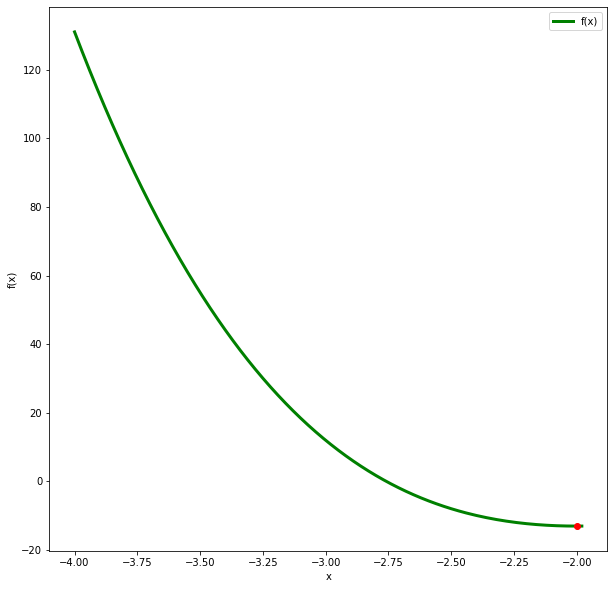

In [5]:
import math as mt
import matplotlib.pyplot as plt
#detallar un minimo
lim_min = -4
lim_max = 4
totalpasos = abs(lim_min)+abs(lim_max)
paso = 0.01
tolerancia = totalpasos / paso
posicion = 1
empeora = 0
fx = []
vecx = []
posicionfx = 0
secuencia = 0
while empeora < 3:
    vecx.append(lim_min)
    fx.append((mt.pow(lim_min, 4))-(8 * mt.pow(lim_min,2))+3)
    if secuencia == 0:
        menorx = lim_min
        menory = fx[posicionfx]
    if menory > fx[posicionfx]:
        menorx = lim_min
        menory = fx[posicionfx]
    else:
        empeora += 1
    if secuencia > tolerancia:
        break
    posicionfx += 1
    lim_min += paso
    secuencia += 1
print('La posicion menor se detalla en la coordenada (', menorx, ',', menory,')', '. Se encuentra en la secuencia ', secuencia)
print(menorx, menory, secuencia) #Imprimimos los valores
plt.figure(figsize=(10, 10)) #Imprimimos la grafica del vector
plt.plot(vecx, fx, color='green', linewidth=3, label='f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.plot(menorx,menory,'ro') 
plt.show()

## **Paso Acelerado**

45.49619075001069 20.284297760289267 53


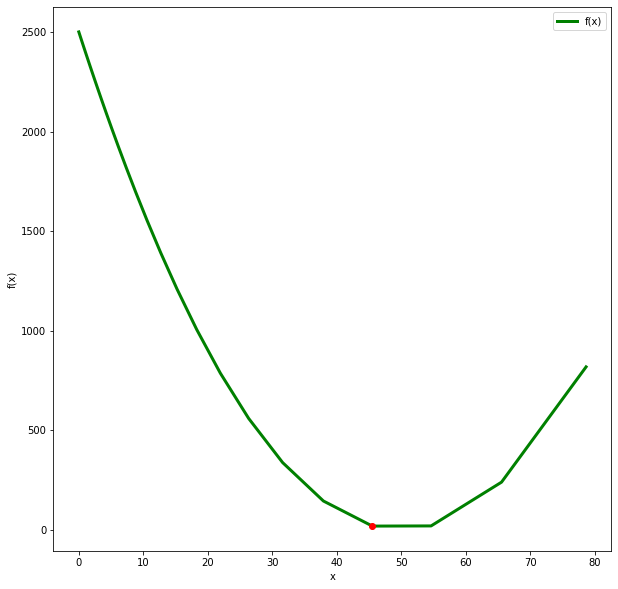

In [11]:
import sys
import math as mt
import matplotlib.pyplot as plt
lim_min = 0 #defino el limite inferior
lim_max = 80 #defino el limite superior
pasoacelerado = 1.2 #debo detallar el paso acelerado, un 20%
tolerancia = 1000 # Detallar la tolerancia
posicion = 1 # debo detallar la primera posicion
incremento = 0.001 # Debo detallar un incremento
#Necesitamos un ciclo while para detallar el avance
empeora = 0 #Control de cambio de sentido
fx = [] #Vector de datos de fx
posicionfx = 0 #Posicion de fx
secuencia = 0 #secuencia incia en cero
vecx = [] # vector de posiciones x
menorx = sys.maxsize #Detallo el mayor valor posible
menory = sys.maxsize #Detallo el mayor valor posible
#Ahora para el ciclo while
while empeora < 3:
    vecx.append(lim_min) #Agrego el valor x
    fx.append(mt.pow((50-lim_min),2)) #Agrego el valor y
    if posicion == 0: # si es la primera posicion asigno la posicion cero
        anterior = fx[posicionfx]
    else: # si es diferente a la primera posicion detallo la posicion anterior
        anterior = fx[posicionfx-1]
#------------------
    if secuencia == 0: #Si es la primera posicion la detallo como la menor
        menorx = lim_min
        menory = fx[posicionfx]
    elif anterior > fx[posicionfx]:
        pass #mejora, seguimos
    else: 
        empeora += 1 #Detallamos que empeora
    secuencia += 1
    if menory > fx[posicionfx]: #Actualizo el menor en caso de ser menor
        menorx = lim_min 
        menory = fx[posicionfx]
    if secuencia > tolerancia: # la tolerancia detalla los valores con los cuales si la ecuacion sigue bajando en el rango detallado termina luego de una cantidad de pasos fija
        break #Break termina el ciclo
    posicionfx += 1 #Cambiamos la posicion del vector 
    incremento *= pasoacelerado #incremento el paso acelerado
    lim_min += incremento #Incrementams un paso acelerado
print(menorx, menory, secuencia) #Imprimimos los valores
plt.figure(figsize=(10, 10)) #Imprimimos la grafica del vector
plt.plot(vecx,fx, color='green', linewidth=3, label='f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.plot(menorx,menory,'ro') 
plt.show()

## **Bisección**

In [12]:
def funcionfdex(x): #La funcion ejecuta la instruccion con base en x y retorna y
    y = (50 - x) ** 2
    return y

import math as mt
a = 21 #Limite inicial
b = 93 #Limite final
iteracion = 1
delta = 0.25 #Delta de movimiento
rango = b-a #Rango
ensayos0 = (mt.log(b-a) - mt.log(delta*2))/mt.log(2) #Detallamos de acuerdo a la ecuacion cuantos pasos
#Siempre debemos redondear hacia arriba
ensayos = round(ensayos0,0)
if ensayos0 > ensayos:
    ensayos += 1
v_iteracion, v_a, v_b, v_puntomedio, v_x1, v_x2, v_fx1, v_fx2, v_rango = [], [], [], [], [], [], [], [], []
while rango > delta * 2:
    if iteracion > ensayos:
        print('Terminacion por exceso')
        break
    if iteracion == 1:
        puntomedio = ((b - a) / 2) + a #Defino el punto medio
        x1 = puntomedio - delta
        x2 = puntomedio + delta
        #Llamamos la funcion para hallar fx1 y fx2
        fx1 = funcionfdex(x1)
        fx2 = funcionfdex(x2)
        #Escribimos todos los datos llamando el programa
        v_iteracion.append(iteracion)
        v_a.append(a)
        v_b.append(b)
        v_puntomedio.append(puntomedio)
        v_x1.append(x1)
        v_x2.append(x2)
        v_fx1.append(fx1)
        v_fx2.append(fx2)
        v_rango.append(rango)
    if fx1 < fx2:
        a = a
        b = (a + b)/2
    elif fx1 > fx2:
        a = (a + b)/2
        b = b
    else:
        print('Terminacion por igualacion, ambos extremos son iguales')
        break
    puntomedio = ((b - a)/2) + a
    x1 = puntomedio - delta
    x2 = puntomedio + delta
    fx1 = funcionfdex(x1)
    fx2 = funcionfdex(x2)
    rango = b - a
    #Escribimos todos los datos llamando el programa
    iteracion = iteracion + 1
    v_iteracion.append(iteracion)
    v_a.append(a)
    v_b.append(b)
    v_puntomedio.append(puntomedio)
    v_x1.append(x1)
    v_x2.append(x2)
    v_fx1.append(fx1)
    v_fx2.append(fx2)
    v_rango.append(rango)
print("La solucion optima se encuentra entre: ", a, " y ", b, "Con una solucion optima de: ", puntomedio, " Con una precision  de: ", rango)

La solucion optima se encuentra entre:  49.96875  y  50.25 Con una solucion optima de:  50.109375  Con una precision  de:  0.28125


## **Paso Aleatorio Minimizar**

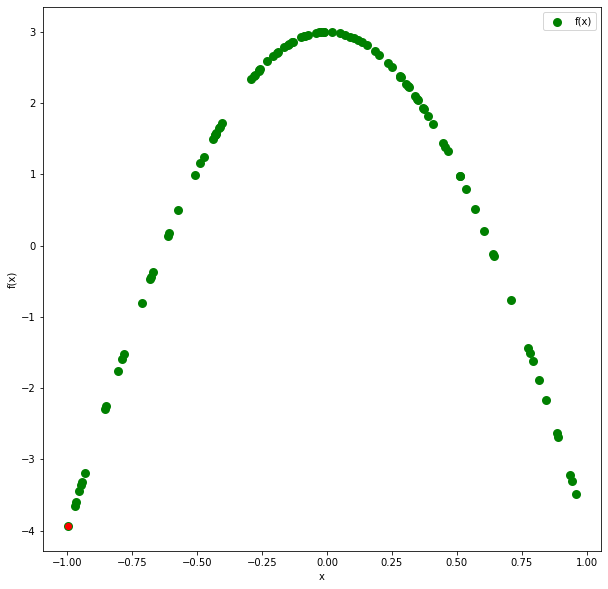

In [15]:
import sys
import random as rnd
import matplotlib.pyplot as plt
import math as mt
#Hallar el menor
lim_min = -1.0 #Limite inferior del metodo de busqueda
lim_max = 1.0 #Limite superior del metodo de busqueda
iteraciones = 100 #Iteraciones a buscar aleatoriamente
menory = sys.maxsize #Tomamos el maximo del sistema para hallar el menor
menorx = lim_max #El menor x es el mayor posible del rango a buscar
x, y = [] , [] #creamos los vectores
t = 0 #El apuntador de los vectores
for i in range(iteraciones): #ciclo para cantidad de ejecuciones
    x.append(rnd.uniform(lim_min, lim_max)) #agregamos un valor aleatorio de x
    y.append((mt.pow(x[t], 4)) - (8 * mt.pow(x[t], 2)) + 3) #agregamos su correspondiente f(x)
    if y[t] < menory: #Validamos si es menor a los casos detallados y actualizamos
        menorx = x[t]
        menory = y[t]
        iteracionmenor = i #La primera posicion = 0, puedo hacer i + 1 para detallar posiciones unitarias desde 1 hasta iteraciones
    t += 1
#ya tengo menores valores y solo debo pintar
#Hagamos un scatter y pintemos adicional el valor menorxy
plt.figure(figsize=(10, 10)) #Imprimimos la grafica del vector
plt.scatter(x, y, color='green', linewidth=3, label='f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.plot(menorx,menory,'ro') 
plt.show()

## **Paso Aleatorio Maximizar**